In the early discussion of Markov chains, the key interest was to determine whether or not a Markov chain converges to a stationary distribution $\pi$ or not. This is a very natural question, and tells us a lot about how the system acts globally. However, often times when observing a natural or large system, the easily accessible information is the stationary distribution, rather than the details of the Markov chain. If it is possible to construct a Markov chain that simulates the observed stationary distribution, this can give a lot more information about the behavior of the system. 

One of the most popular techniques in accomplishing this is the Metropolis algorithm. In this algorithm, you are given a chain with state space $\Omega$ and an arbitrary stationary distribution $\pi_0$, and the goal is to modify the chain so that the new chain has stationary distribution $\pi$. 

As an example, consider a function $f$ defined on the vertex set $\Omega$ of a graph. The goal is to find a vertex $x$ where $f(x)$ is maximized. If $\Omega$ is large, an exhaustive search might be too expensive. Assume that the graph is regular, and thus that our transition matrix is symmetric. 

Now fix $\lambda \geq 1$ and define 

$$\pi_\lambda(x) = \frac{\lambda^{f(x)}}{Z(\lambda)}$$

Since the value of $\pi_\lambda$ increases as $f(x)$ increases, this probability favors vertices where $f(x)$ is large. 

In [22]:
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np

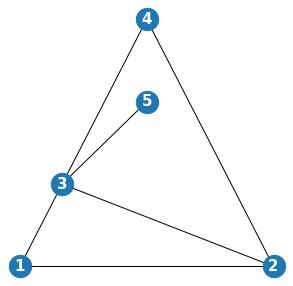

In [19]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5])
G.add_edges_from([(1,2), (1,3), (2,3), (2,4), (3,4), (3,5)])

fig, ax = plt.subplots(1,1, figsize=(5,5))
nx.draw_planar(G, with_labels=True, font_weight='bold', ax=ax, node_size=500, font_size=15, font_color="white")

The transition matrix for a random walk on the above graph is the following: 

$$
P = 
\begin{bmatrix}
0 & \frac{1}{2} & \frac{1}{2} & 0 & 0 \\
\frac{1}{3} & 0 & \frac{1}{3} & \frac{1}{3} & 0 \\
\frac{1}{4} & \frac{1}{4} & 0 & \frac{1}{4} & \frac{1}{4} \\
0 & \frac{1}{2} & \frac{1}{2} & 0 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix}
$$

If we start from state 1, the probability of ending in any of the other states can be modeled as shown next. 

In [24]:
def random_walk(P, v, T):
    """
    Plot the probabilities of being on the east or west lilipad at each time t.
    
    @params
        - P: The transition matrix for the random walk on a graph
        - v: The total number of vertices in the graph
        - T: The number of time steps to run the random walk
    """

    mu_0 = np.zeros(v)
    mu_0[0] = 1
    
    # Plotting the probabilities of being on the East lilipad for different values of p and q

    ts = range(0, T)
    ys = []
    for t in ts:
        P_t = np.linalg.matrix_power(P, t)
        y   = mu_0.dot(P_t)
        ys.append(y)
        
    plt.plot(ys)
    plt.xticks(range(0, T, T//5))
    plt.legend(["Vertex 1", "Vertex 2", "Vertex 3", "Vertex 4", "Vertex 5"])
    plt.show()
    
#     print("The probability of staying on the east lilipad should converge to", q, "/(", p, "+", q, ") = ", q / (p+q))

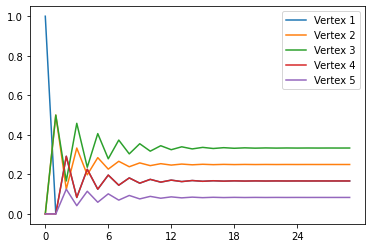

In [47]:
P = [[0, 1/2, 1/2, 0, 0], 
     [1/3, 0, 1/3, 1/3, 0], 
     [1/4, 1/4, 0, 1/4, 1/4],
     [0, 1/2, 1/2, 0, 0], 
     [0, 0, 1, 0, 0]]

random_walk(P, 5, 30)

As we can see above, the chain converges to a probability distribution that favors being on vertex 3 and avoids vertex 5. This makes sense, as the degree of vertex 3 is the highest, thus having many different locations to enter into it from, while vertex 5 has degree 1. If our function $f$ was defined so that vertex 5 was the maximum, this random walk isn't a great way to determine that this is the vertex we want.  

Now let's implement the metropolis algorithm, and make it possible for our algorithm to determine where the maximum point is. For simplicity, let's first define the vertex label as the result of evaluating $f$ on that vertex. 

In [81]:
def f(x):
    return x

def P_lambda(P, f, lmbd):
    P_f = np.zeros([5,5])

    for i in range(5):
        row_sum = 0
        for j in range(5):
            P_f[i][j] = P[i][j] * np.min([1.0, (lmbd**f(j+1)) / (lmbd**f(i+1))])
            row_sum += P_f[i][j]
        P_f[i][i] = 1 - row_sum
    
    return P_f

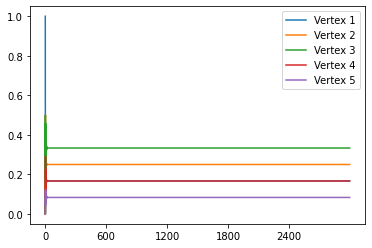

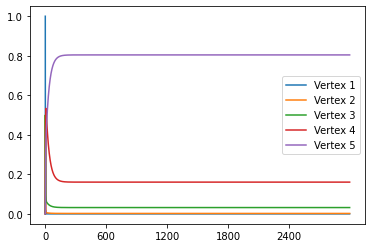

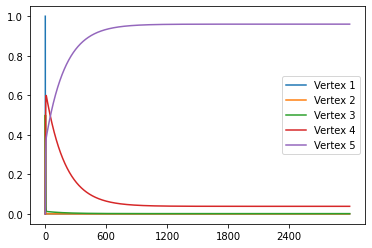

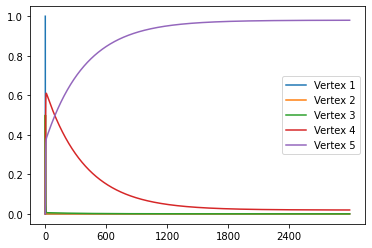

In [82]:
# Plotting the random walk with varying degrees of lambda
random_walk(P_lambda(P, f, 1), 5, 3000)
random_walk(P_lambda(P, f, 10), 5, 3000)
random_walk(P_lambda(P, f, 50), 5, 3000)
random_walk(P_lambda(P, f, 100), 5, 3000)

We can try the same for a graph with multiple peaks. 

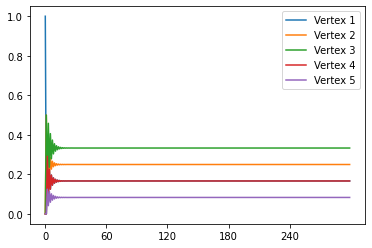

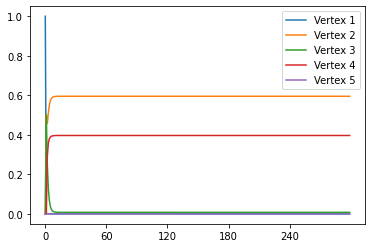

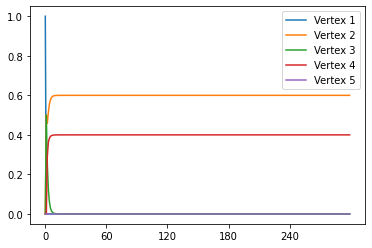

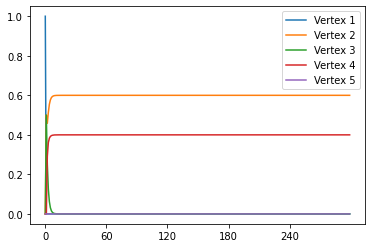

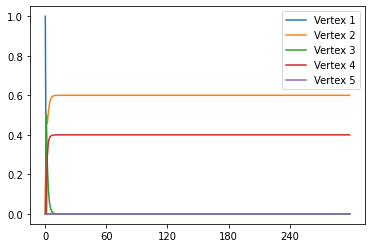

In [93]:
def g(x):
    if (x == 4 or x == 2):
        return 5
    elif (x ==0 or x == 3):
        return 3
    else:
        return 1
    
# Plotting the random walk with varying degrees of lambda
random_walk(P_lambda(P, g, 1), 5, 300)
random_walk(P_lambda(P, g, 10), 5, 300)
random_walk(P_lambda(P, g, 50), 5, 300)
random_walk(P_lambda(P, g, 100), 5, 300)
random_walk(P_lambda(P, g, 1000), 5, 300)